In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from grouper import group_by_volume, group_by_time, VolumeGrouper
from pyfolio.timeseries import perf_stats
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var, summary
import sys
sys.path.append('/home/tomek/ib_tools')
import matplotlib.pyplot as plt
%matplotlib inline
from tester import run, simulate, calibrate, calibrate_multiple, get_data

In [2]:
sym = 'NQ'
volume = 10000
start_date = '20190101'
end_date = '20190630'

In [3]:
data = VolumeGrouper(get_data(sym, start_date, end_date), volume).df

In [4]:
def ema(data, slow, fast):
    data = data.copy()
    data['ema_fast'] = data.close.ewm(span=slow).mean()
    data['ema_slow'] = data.close.ewm(span=fast).mean()
    data['ema_diff'] = data.ema_fast - data.ema_slow
    return data['ema_diff']

In [5]:
def breakout(data, periods, smooth, vol):
    up  = (data.close >= data.close.rolling(periods).max()) * 1
    down = (data.close <= data.close.rolling(periods).min()) * 1
    return (up - down).ewm(span=max((int(periods/3), 1))).mean().rename(f'break_{periods}', inplace=True)

In [6]:
data['forecast'] = ema(data, 20, 120)

In [7]:
out = summary(data, slip=1.5, )
out.stats

,0,3,5,6,7,10,15,17,19,20
Annual return,0.168031,0.115395,0.120425,0.128245,0.119187,0.133001,0.0772113,0.0789526,0.0577403,0.0701013
Cumulative returns,0.0814211,0.0565802,0.0589788,0.0626977,0.0583892,0.0649526,0.0381943,0.0390397,0.0286941,0.0347352
Annual volatility,0.154871,0.152502,0.147707,0.145838,0.141687,0.134736,0.12718,0.125508,0.124227,0.12275
Sharpe ratio,1.08036,0.792195,0.843497,0.900124,0.865368,0.993971,0.648036,0.667858,0.513536,0.612916
Calmar ratio,1.52676,1.11669,1.22728,1.40889,1.2067,1.58135,0.928291,1.05088,0.799556,1.11791
Stability,0.00880964,0.00425495,0.00537899,0.0362656,0.0134807,0.0174699,0.0718921,0.0200804,0.048871,0.00129683
Max drawdown,-0.110057,-0.103336,-0.0981231,-0.0910256,-0.0987711,-0.0841055,-0.0831758,-0.0751297,-0.0722154,-0.0627074
Omega ratio,1.19749,1.13802,1.14931,1.15963,1.15209,1.18146,1.1143,1.1174,1.08898,1.10982
Sortino ratio,1.48066,1.08162,1.16892,1.25698,1.21204,1.4225,0.949896,0.993635,0.77256,0.923973
Skew,-0.737878,-0.627607,-0.567975,-0.510942,-0.486821,-0.416057,-0.19715,-0.16974,0.0148799,0.00221403


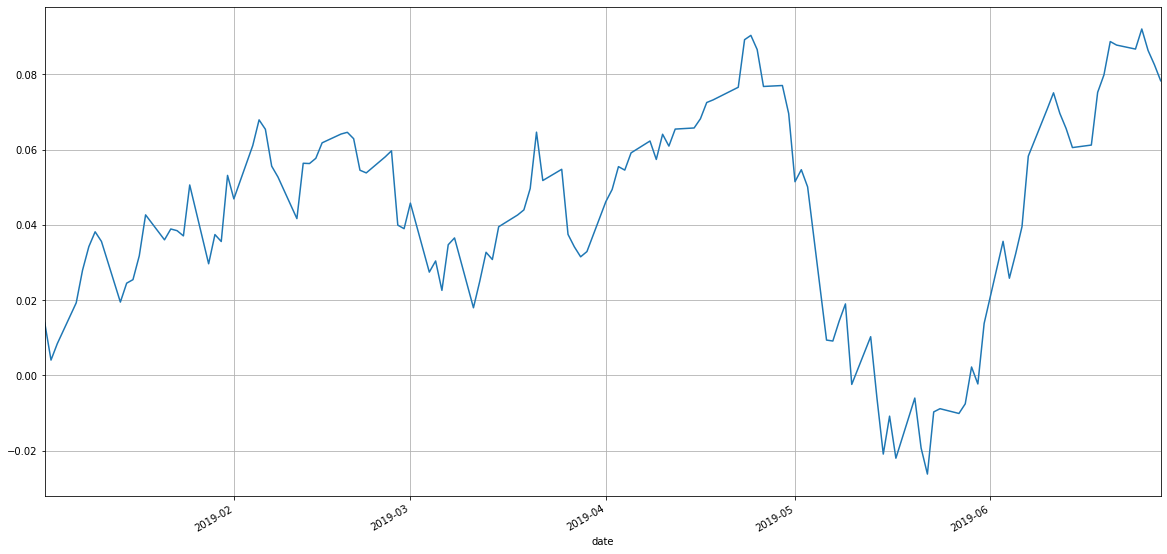

In [8]:
np.log(out.returns[0]+1).cumsum().plot(figsize=(20, 10), grid=True);

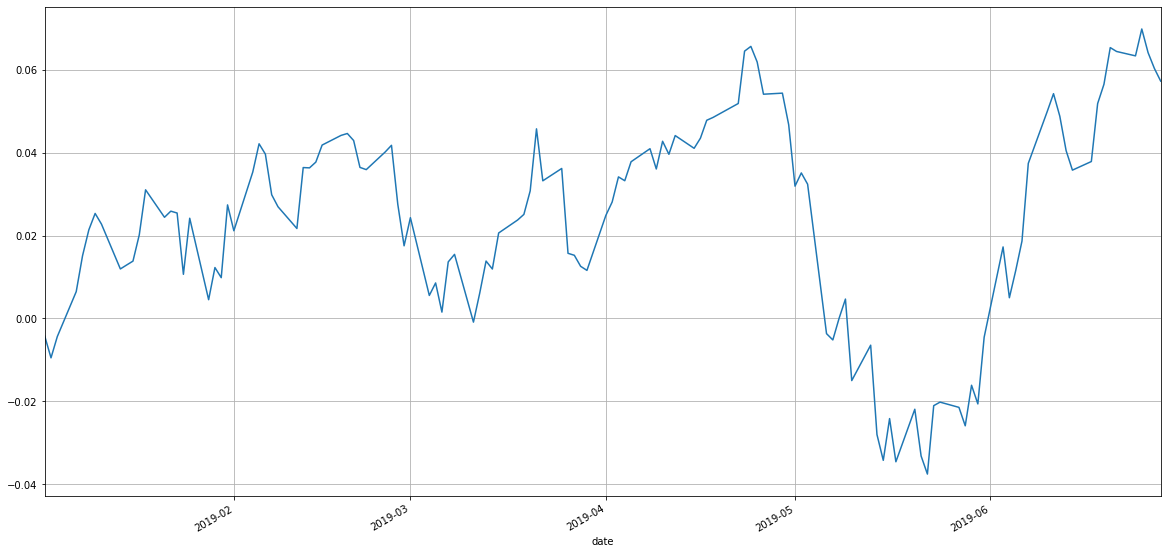

In [9]:
np.log(out.returns[5]+1).cumsum().plot(figsize=(20, 10), grid=True);

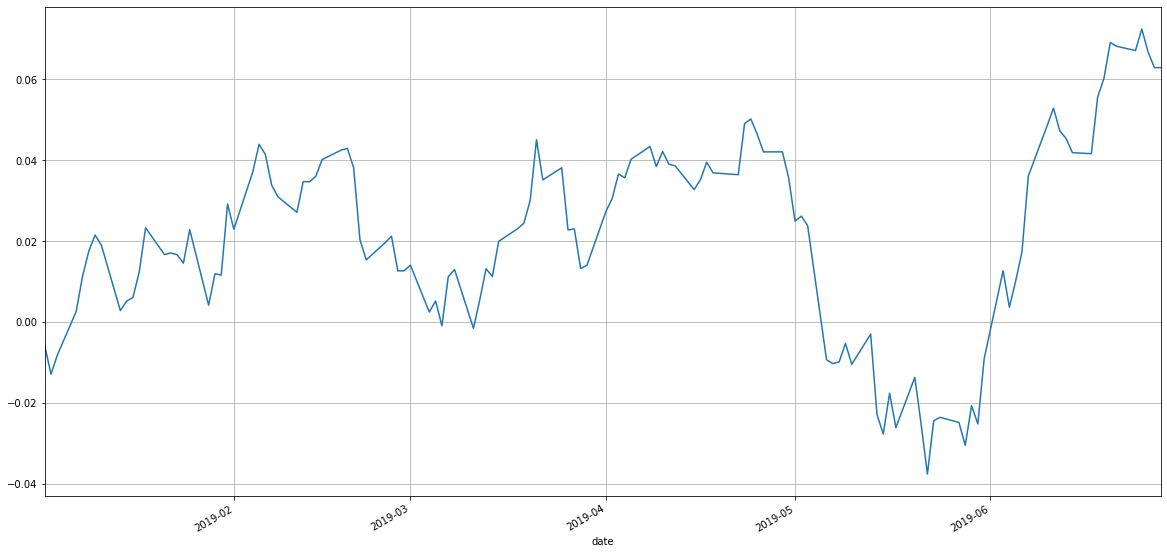

In [10]:
np.log(out.returns[10]+1).cumsum().plot(figsize=(20, 10), grid=True);

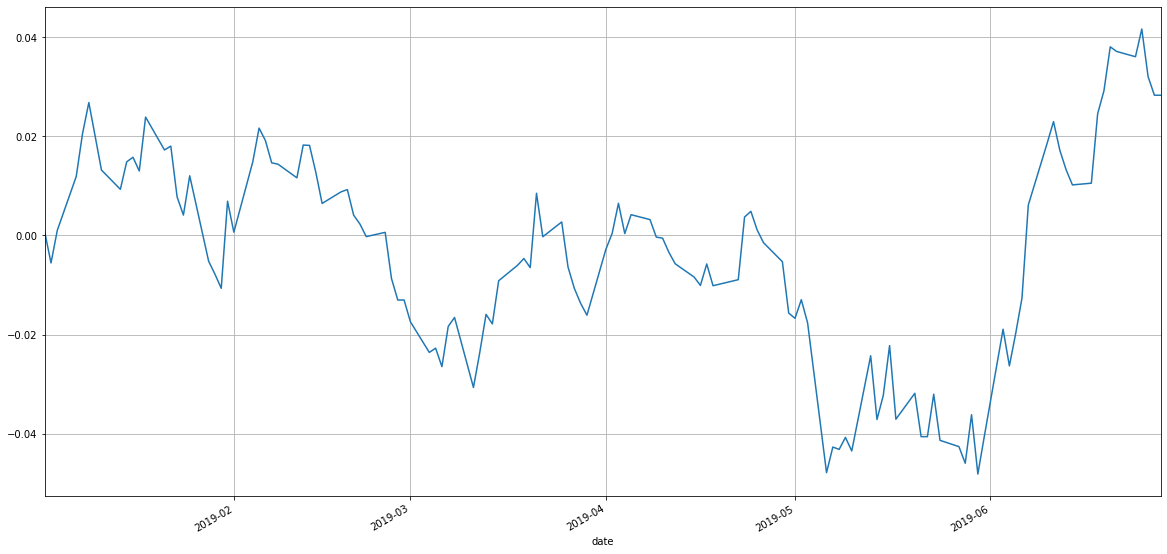

In [11]:
np.log(out.returns[19]+1).cumsum().plot(figsize=(20, 10), grid=True);